In [ ]:
# This code is for seeing I,DoLP, and AoLP at one shot.

In [18]:
import numpy as np
a =np.load('arr.npy')
a.shape
a[1][1].shape
img = a[1][1]

(2048, 2448)

In [21]:
import cv2
import polanalyser as pa
from PIL import Image
# Based on https://github.com/elerac/polanalyser
# polanalyzer has 

#img_raw = cv2.imread("spoons.png", 0)
img_demosaiced = pa.demosaicing(img)
img_0_i, img_45_i, img_90_i, img_135_i = cv2.split(img_demosaiced)

Image.fromarray(img_0).show()
Image.fromarray(img_45).show()
Image.fromarray(img_90).show()
Image.fromarray(img_135).show()

NameError: name 'calcLinearStokes' is not defined

In [43]:
Stokes = pa.calcLinearStokes([img_0, img_45, img_90, img_135], [0,45,90,135])
I = Stokes[:, :, 0]
DoLP = pa.cvtStokesToDoLP(Stokes)
AoLP = pa.cvtStokesToAoLP(Stokes)


(2048, 2448)

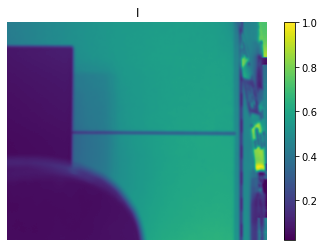

<Figure size 432x288 with 0 Axes>

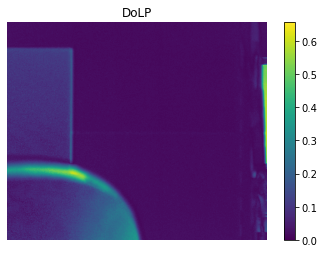

<Figure size 432x288 with 0 Axes>

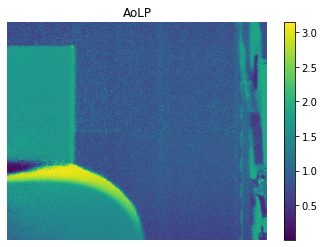

(2048, 2448)

<Figure size 432x288 with 0 Axes>

In [48]:
import matplotlib.pyplot as plt
from mpldatacursor import datacursor

plt.figure(1)
im1 = plt.imshow(I/np.max(I))
plt.colorbar(im1)
datacursor(im1)
plt.title('I')
plt.axis('off')
plt.show(block=False)
plt.savefig('I.png')

plt.figure(2)
im2 = plt.imshow(DoLP)
plt.colorbar(im2)
datacursor(im2)
plt.title('DoLP')
plt.axis('off')
plt.show(block=False)
plt.savefig('DoLP.png')

plt.figure(3)
im3 = plt.imshow(AoLP)
plt.colorbar(im3)
datacursor(im3)
plt.title('AoLP')
plt.axis('off')
plt.show(block=False)
plt.savefig('AoLP.png')
